# Data wrangling<a id='2_Data_wrangling'></a>

## Introduction<a id='2.2_Introduction'></a>

Lending loans is a significant source of revenue for banks, but it is not without risk. Loan defaults by borrowers are a common occurrence. To address this issue, we can use machine learning techniques to develop a robust model that can predict whether a new borrower is likely to default on their loan. The banks have gathered extensive data on past borrowers, and we can help to create a powerful machine learning model for this purpose.

The dataset provided is vast and includes various deterministic factors such as borrower's income, gender, loan purpose, and more. However, the dataset has issues with multicollinearity and missing values and we will try to fix these issues in this notebook.

## 1. Data Collection<a id='2.3_Imports'></a>

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import os


## 1.1 Load The Loan Default Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
# the supplied CSV data file is the raw_data directory
loan_data = pd.read_csv('C:/Springboard/Capstone2/Loan_Default.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
#Call the info method on loan_data to see a summary of the file
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
#Call the head method on loan_data to print the first several rows of the data
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## 2. Data Definition<a id='2.6_Explore_The_Data'></a>

### 2.1 Explore the features of our data<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [5]:
#Set number of columns to display all 34 columns
pd.set_option("display.max_columns", loan_data.shape[-1]) 
loan_data.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
loan_data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
#convert all features to lower case
loan_data.columns= loan_data.columns.str.lower()

In [8]:
#check result
loan_data.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

### 2.2 Factors overview<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Let look at some factors of loan application in detail:

In [9]:
loan_data['loan_amount'].max()

3576500

In [10]:
loan_data['loan_amount'].min()

16500

In [11]:
loan_data['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [12]:
loan_data['rate_of_interest'].max()

8.0

In [13]:
#the factor we should pay attention for
loan_data['rate_of_interest'].min()

0.0

In [14]:
loan_data['rate_of_interest'].mean()

4.045475804366537

In [15]:
loan_data['status'].value_counts()

0    112031
1     36639
Name: status, dtype: int64

In [16]:
loan_data['property_value'].max()

16508000.0

In [17]:
loan_data['property_value'].min()

8000.0

In [18]:
loan_data['property_value'].value_counts()

308000.0     2792
258000.0     2763
358000.0     2679
408000.0     2537
328000.0     2524
             ... 
4648000.0       1
3878000.0       1
5758000.0       1
2618000.0       1
2698000.0       1
Name: property_value, Length: 385, dtype: int64

In [19]:
loan_data['income'].max()

578580.0

In [20]:
loan_data['income'].min()

0.0

In [21]:
loan_data['income'].mean()

6957.338876146789

## 3. Data Cleaning<a id='2.6_Explore_The_Data'></a>

### 3.1 Duplicates and missing values<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

First we check for duplicated entries and delete and we find them.

In [22]:
loan_data.duplicated().sum()

0

Now check for missing values in each column.

In [23]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
upfront_charges,39642,26.664425
interest_rate_spread,36639,24.644515
rate_of_interest,36439,24.509989
dtir1,24121,16.224524
ltv,15098,10.155378
property_value,15098,10.155378
income,9150,6.154571
loan_limit,3344,2.249277
approv_in_adv,908,0.610749
submission_of_application,200,0.134526


We can see many columns with null values. We start working with them based on their data type.

In [24]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

### 3.2 Divide and conquer <a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Devide data for categorical and numerical values and handle each of them separately.

In [25]:
dtypes = pd.DataFrame(loan_data.dtypes).reset_index()

categ_type = []
numer_type = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        categ_type.append(i)
    else:
        numer_type.append(i)

In [30]:
#Start with numeric data type
loan_data_num = loan_data[numer_type]

#knn
knn = KNNImputer(n_neighbors = 3)
knn.fit(loan_data_num)
X = knn.fit_transform(loan_data_num)

#Check for any nas
loan_data_num = pd.DataFrame(X, columns=numer_type)
nas_num = loan_data_num.isna().sum()
print(nas_num)


id                      0
year                    0
loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


In [31]:
# Categorical data type
loan_data_cat = loan_data[categ_type]

for i in categ_type:
    mode = loan_data[i].mode()
    mode = mode[0]
    loan_data_cat[i].fillna(value=mode, inplace=True)

# Check for any nas
nas_cat = loan_data_cat.isna().sum()
print(nas_cat)

C:\Users\bayar\AppData\Local\Temp\ipykernel_12724\3135984884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cat[i].fillna(value=mode, inplace=True)
C:\Users\bayar\AppData\Local\Temp\ipykernel_12724\3135984884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cat[i].fillna(value=mode, inplace=True)
C:\Users\bayar\AppData\Local\Temp\ipykernel_12724\3135984884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
region                       0
security_type                0
dtype: int64


In [36]:
loan_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 148670 non-null  object
 1   gender                     148670 non-null  object
 2   approv_in_adv              148670 non-null  object
 3   loan_type                  148670 non-null  object
 4   loan_purpose               148670 non-null  object
 5   credit_worthiness          148670 non-null  object
 6   open_credit                148670 non-null  object
 7   business_or_commercial     148670 non-null  object
 8   neg_ammortization          148670 non-null  object
 9   interest_only              148670 non-null  object
 10  lump_sum_payment           148670 non-null  object
 11  construction_type          148670 non-null  object
 12  occupancy_type             148670 non-null  object
 13  secured_by                 148670 non-null  

Convert our categorical data into numerical for machine learning model.

In [39]:
loan_data_cat = pd.get_dummies(loan_data_cat, columns=categ_type, drop_first=True)

In [40]:
loan_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   loan_limit_ncf                     148670 non-null  uint8
 1   gender_Joint                       148670 non-null  uint8
 2   gender_Male                        148670 non-null  uint8
 3   gender_Sex Not Available           148670 non-null  uint8
 4   approv_in_adv_pre                  148670 non-null  uint8
 5   loan_type_type2                    148670 non-null  uint8
 6   loan_type_type3                    148670 non-null  uint8
 7   loan_purpose_p2                    148670 non-null  uint8
 8   loan_purpose_p3                    148670 non-null  uint8
 9   loan_purpose_p4                    148670 non-null  uint8
 10  credit_worthiness_l2               148670 non-null  uint8
 11  open_credit_opc                    148670 non-null  uint8
 12  bu

In [ ]:
# Combining dataframes
loan_data_comb = pd.concat([loan_data_num, loan_data_cat], axis=1, join='inner')

In [41]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   loan_limit_ncf                     148670 non-null  uint8
 1   gender_Joint                       148670 non-null  uint8
 2   gender_Male                        148670 non-null  uint8
 3   gender_Sex Not Available           148670 non-null  uint8
 4   approv_in_adv_pre                  148670 non-null  uint8
 5   loan_type_type2                    148670 non-null  uint8
 6   loan_type_type3                    148670 non-null  uint8
 7   loan_purpose_p2                    148670 non-null  uint8
 8   loan_purpose_p3                    148670 non-null  uint8
 9   loan_purpose_p4                    148670 non-null  uint8
 10  credit_worthiness_l2               148670 non-null  uint8
 11  open_credit_opc                    148670 non-null  uint8
 12  bu

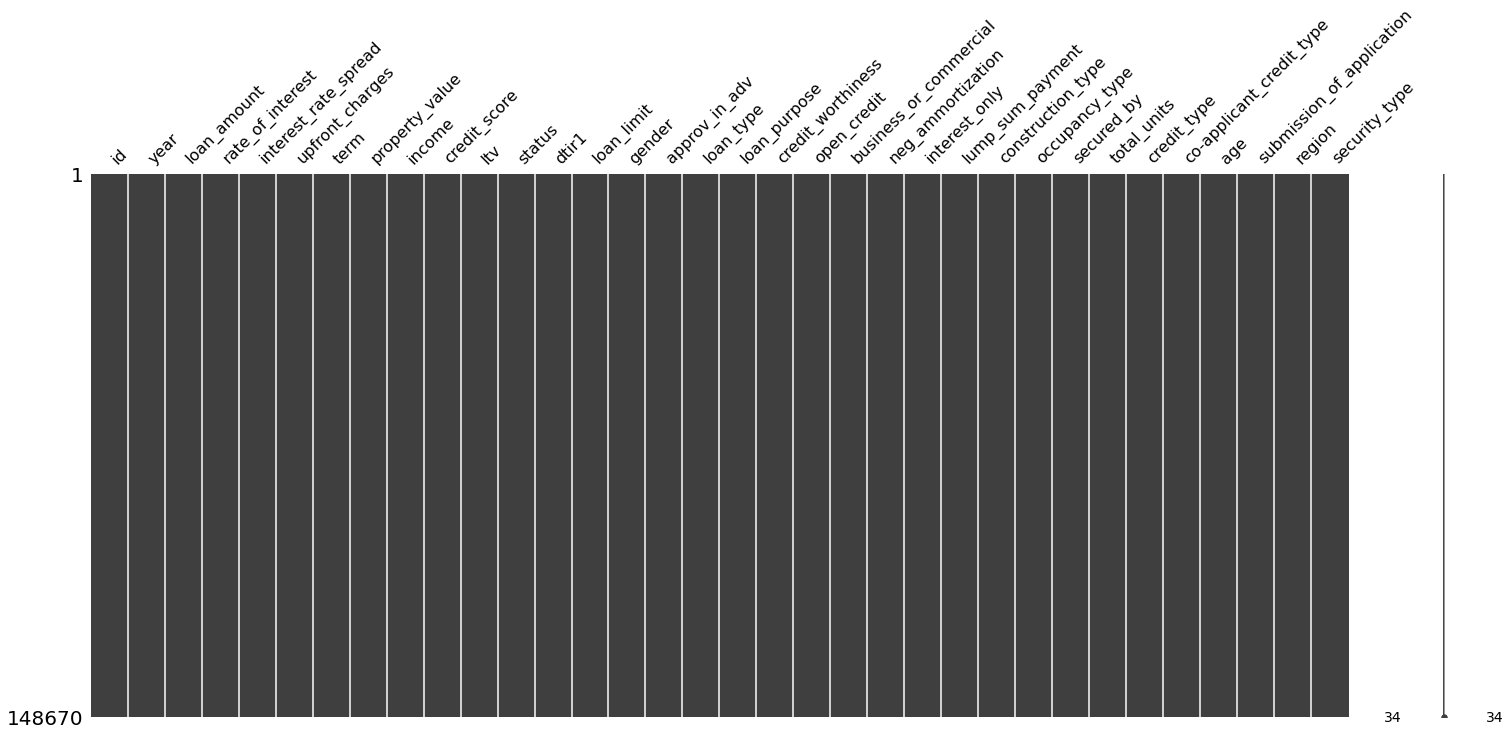

<Figure size 1080x648 with 0 Axes>

In [33]:
import missingno as msno

# Full dataframe visualization of null values
msno.matrix(loan_data_comb)
plt.figure(figsize = (15,9))
plt.show()

Now all our dataset is clean and ready to be used for training.

## Summary <a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

Drawing from the information provided, it can be inferred that:

1) There are 148,670 Rows and 34 Columns in dataset.

3) We examined some application features in-depth, such as loan amount, age, rate of interest, status, property value, income. 

4) As the result after cleaning data the final document contains only 277 rows.

5) Then we checked for duplicated entries and filled missing values.

6) The last step was to convert all values to numerical values for our machine learning model.